In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import pickle

In [40]:
# Set Flags
DEBUG = False
USE_STORED_DATASET = True

In [35]:
# Utility
def debug_print(*args):
    if DEBUG:
        string = ''
        for arg in args:
            strarg = arg
            if type(arg) != type(''):
                strarg = str(arg)
            string += ' ' + strarg + ' '
        print(string)

# Layers
class Dense:
    def __init__(self, in_size, out_size, act_fwd, act_bwd):
        np.random.seed(seed=2)
        self.W = np.random.rand(out_size, in_size)*0.1
        self.b = np.random.rand(out_size)*0.1#np.random.rand(in_size)*0.01
        self.act_fwd = act_fwd
        self.act_bwd = act_bwd
        
    def prop_fwd(self, A):
        self.A = A
        debug_print('A', self.A)
        debug_print('W', d2.W)
        self.Z = np.dot(self.W, A)+self.b 
        debug_print('Z', self.Z)
        return self.act_fwd(self.Z)
    
    def prop_bwd(self, dA, Z):
        return self.act_bwd(dA, Z)
        

In [36]:
#Activation and Loss functions
def relu(Z):
    return np.maximum(0,Z)

def relu_grad(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sigmoid_grad(dA, Z):
    sig = sigmoid(Z)
    return np.convolve(dA, sig * (1 - sig), 'same')#dA * sig * (1 - sig)

def tanh(Z):
    t=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return t

def tanh_grad(dA, Z):
    t=tanh(Z)
    dt=1-t**2
    return dA * dt

def softmax(Z):
    eZ = np.exp(Z - np.max(Z))
    return eZ / eZ.sum(axis=0)

def softmax_grad(dA, Z):
    s = softmax(Z)
    s = Z.reshape(-1,1)
    jacobian = (np.diagflat(s) - np.dot(s, s.T))
    debug_print(dA.shape)
    debug_print(jacobian.shape)
    return np.matmul(dA, jacobian)

def binary_crossentropy_loss(Y_hat, Y): #binary cross entropy
    m = Y_hat.shape[0]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)
    
def binary_crossentropy_loss_grad(Y_hat, Y): #binary cross entropy
    eps = 1e-8
    return -(np.divide(Y, Y_hat+eps) - np.divide(1 - Y, 1 - Y_hat+eps))
    
def multi_cross_entropy(X,y):
    #TODO
    pass

def multi_cross_entropy_grad(X,y):
    #TODO
    pass

In [41]:
#Simple verbose debugging example
d1 = Dense(8,4,tanh, tanh_grad)
d2 = Dense(4,2,softmax, softmax_grad)
y = np.array([1.0, 0.0])
DEBUG=True
#d1.W *= 1e1
#d2.W *= 1e-1
for i in range(7):
    debug_print('------FWD------')
    y_hat = 1-d2.prop_fwd(d1.prop_fwd(np.ones(8)))
    debug_print('Y_hat', y_hat)
    alpha = 1.0e-7
    
    debug_print('\n------BWD------')
    debug_print('D2')
    dA = binary_crossentropy_loss_grad(y_hat, y)
    debug_print('dA', dA)
    dZ = d2.prop_bwd(dA, d2.Z)
    debug_print('dZ', dZ)
    dW = np.array([np.array([np.sum(d2.A)*z]) for z in dZ])/d2.A.shape[0]
    debug_print('dW', dW)
    db = np.sum(dZ, axis=0, keepdims=True)/d2.A.shape[0]
    dA = np.dot(d2.W.T, dZ)
    debug_print('PRE', d2.W)
    d2.W -= dW#*alpha
    debug_print('POST', d2.W)
    d2.b -= db#*alpha
    
    debug_print('D1')
    debug_print('dA', dA)
    dZ = d1.prop_bwd(dA, d1.Z)
    #print(dZ.shape)
    debug_print('dZ', dZ)
    dW = np.array([np.array([np.sum(d1.A)*z]) for z in dZ])/d1.A.shape[0]
    debug_print('dW', dW)
    db = np.sum(dZ, axis=0, keepdims=True)/d1.A.shape[0]
    dA = np.dot(d1.W.T, dZ)
    debug_print('PRE', d1.W)
    d1.W -= dW*alpha
    debug_print('POST', d1.W)
    d1.b -= db*alpha
DEBUG=False

 ------FWD------ 
 A  [1. 1. 1. 1. 1. 1. 1. 1.] 
 W  [[0.04359949 0.00259262 0.05496625 0.04353224]
 [0.04203678 0.03303348 0.02046486 0.0619271 ]] 
 Z  [0.3661935  0.38177608 0.38748417 0.26834188] 
 A  [0.35065773 0.3642489  0.36918932 0.26208128] 
 W  [[0.04359949 0.00259262 0.05496625 0.04353224]
 [0.04203678 0.03303348 0.02046486 0.0619271 ]] 
 Z  [0.07790026 0.077241  ] 
 Y_hat  [0.49983518 0.50016482] 
 
------BWD------ 
 D2 
 dA  [-2.00065944  2.00065944] 
 (2,) 
 (2, 2) 
 dZ  [-0.15574915  0.15463481] 
 dW  [[-0.05241649]
 [ 0.05204147]] 
 PRE  [[0.04359949 0.00259262 0.05496625 0.04353224]
 [0.04203678 0.03303348 0.02046486 0.0619271 ]] 
 POST  [[ 0.09601598  0.05500911  0.10738274  0.09594873]
 [-0.01000469 -0.01900798 -0.0315766   0.00988563]] 
 D1 
 dA  [-0.00029023  0.00470433 -0.00539637  0.00279598] 
 dZ  [-0.00025455  0.00408017 -0.00466084  0.00260393] 
 dW  [[-0.00025455]
 [ 0.00408017]
 [-0.00466084]
 [ 0.00260393]] 
 PRE  [[0.04359949 0.00259262 0.05496625 0.043532

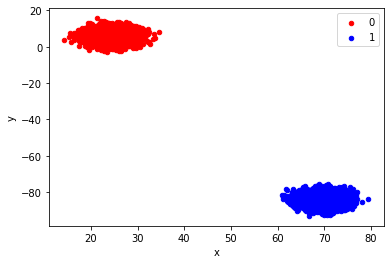

In [38]:
# Generate Dataset
# You might have to do this several times, not all datasets seem
# to have a distribution that can be handled by this simple NN.
# I recommend storing exampls of particular intrest on disk for later usage.


num_classes = 2
num_features = 8
if not USE_STORED_DATASET:
    X, y = make_blobs(n_samples=10000, centers=num_classes, n_features=num_features, cluster_std=0.25, shuffle=True)
        
    with open( "X.p", "wb" ) as ofile:
        pickle.dump(X, ofile)

    with open( "y.p", "wb" ) as ofile:
        pickle.dump(Y, ofile)

elif USE_STORED_DATASET:
    with open( "X.p", "rb" ) as ofile:
        X = pickle.load(ofile)

    with open( "y.p", "rb" ) as ofile:
        Y = pickle.load(ofile)

X*=10
Y = np.zeros(shape = (len(y), num_classes))
for ind, label in enumerate(y):
    Y[ind][label] = 1.0
    
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


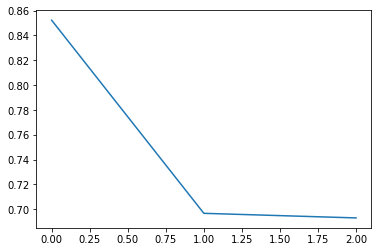

train accuracy 0.9979


In [159]:
#X = (X-X.min())/(X.max()-X.min())
#Gradient Descent
layers = [
    Dense(num_features, 4,tanh, tanh_grad),
    Dense(4,2, tanh, tanh_grad),
    Dense(2, num_classes, softmax, softmax_grad)]

#layers[0].W *= 1e1
#layers[1].W *= 1e-0
#layers[2].W *= 1e-1

epochs = 3
alpha = 1.0e-3
iteration_loss = []
epoch_loss = []
DEBUG=False
for i  in range(epochs):
    #alpha *=1/10
    for j, sample in enumerate(X):
        intermediate = sample
        for layer in layers:
            intermediate = layer.prop_fwd(intermediate)
        Y_hat = 1 - intermediate #TODO: figure why i need to do this
        iteration_loss.append(binary_crossentropy_loss(Y_hat, Y[j]))
        
        dA = binary_crossentropy_loss_grad(Y_hat, Y[j])
        layers.reverse()
        updW = []
        updB = []
        for k, layer in enumerate(layers):
            dZ = layer.prop_bwd(dA, layer.Z)
            dW = np.array([np.array([np.sum(layer.A)*z]) for z in dZ])/layer.A.shape[0]
            db = np.sum(dZ, axis=0, keepdims=True)/layer.A.shape[0]
            dA = np.dot(layer.W.T, dZ)
            updW.append(dW*alpha)
            updB.append(db*alpha)
        
        for k, W in enumerate(updW):
            layers[k].W -= W
            layers[k].b -= updB[k]
        layers.reverse()
        
    epoch_loss.append(np.array(iteration_loss).mean())
        
        
correct = 0
epoch_loss.reverse()#TODO: fix loss reversa
pyplot.plot(epoch_loss) 
pyplot.show()
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1
print('train accuracy', correct/len(Y))

In [160]:
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
        #print(Y_hat)
    
    DEBUG=False
    debug_print('NN:', np.around(Y_hat, decimals=5), 'LABEL:',Y[j])
    DEBUG=False
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1

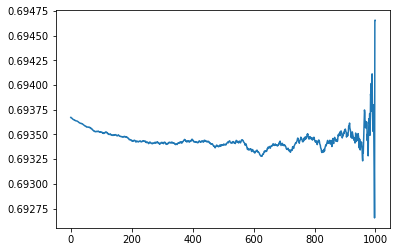

train accuracy 1.0


In [209]:
#Mini Batch Gradient Descent
layers = [
    Dense(num_features, 4,tanh, tanh_grad),
    Dense(4,2, tanh, tanh_grad),
    Dense(2, num_classes, softmax, softmax_grad)]

layers[0].W *= 1e1
layers[1].W *= 1e-1
layers[2].W *= 1e-2

batch_size = 3
epochs = 1000#int(len(X)/batch_size)
alpha = 1.0e-1
iteration_loss = []
epoch_loss = []
DEBUG=False
batch_no = 0
for i  in range(epochs):
    if (batch_no+1)*batch_size > len(X):
        batch_no=0
    dA = 0.0
    for j, sample in enumerate(X[batch_no*batch_size:(batch_no+1)*batch_size]):
        intermediate = sample
        for layer in layers:
            intermediate = layer.prop_fwd(intermediate)
        Y_hat = 1 - intermediate #TODO: figure why i need to do this
        iteration_loss.append(binary_crossentropy_loss(Y_hat, Y[batch_no*batch_size+j]))
        dA += binary_crossentropy_loss_grad(Y_hat, Y[batch_no*batch_size+j])
        
    layers.reverse()
    updW = []
    updB = []
    for k, layer in enumerate(layers):
        dZ = layer.prop_bwd(dA/batch_size, layer.Z)
        dW = np.array([np.array([np.sum(layer.A)*z]) for z in dZ])/layer.A.shape[0]
        db = np.sum(dZ, axis=0, keepdims=True)/layer.A.shape[0]
        dA = np.dot(layer.W.T, dZ)
        updW.append(dW*alpha)
        updB.append(db*alpha)

    for k, W in enumerate(updW):
        layers[k].W -= W
        layers[k].b -= updB[k]
    layers.reverse()
        

    epoch_loss.append(np.array(iteration_loss).mean())
    batch_no+=1
        
correct = 0
epoch_loss.reverse()#TODO: fix loss reversa
pyplot.plot(epoch_loss) 
pyplot.show()
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1
print('train accuracy', correct/len(Y))

In [205]:
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
        #print(Y_hat)
    
    DEBUG=True
    debug_print('NN:', np.around(Y_hat, decimals=5), 'LABEL:',Y[j])
    DEBUG=False
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.3821 0.6179]  LABEL:  [1. 0.] 
 NN:  [0.40018 0.59982]  LABEL:  [1. 0.] 
 NN:  [0.41145 0.58855]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38427 0.61573]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.5055 0.4945]  LABEL:  [1. 0.] 
 NN:  [0.50533 0.49467]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.3801 0.6199]  LABEL:  [1. 0.] 
 NN:  [0.43042 0.56958]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50635 0.49365]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.]

 NN:  [0.38411 0.61589]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.48412 0.51588]  LABEL:  [1. 0.] 
 NN:  [0.45761 0.54239]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39442 0.60558]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.37981 0.62019]  LABEL:  [1. 0.] 
 NN:  [0.3916 0.6084]  LABEL:  [1. 0.] 
 NN:  [0.38025 0.61975]  LABEL:  [1. 0.] 
 NN:  [0.38076 0.61924]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38374 0.61626]  LABEL:  [1. 0.] 
 NN:  [0.3911 0.6089]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38203 0.61797]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.50238 0.49762]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.50638 0.49362]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.50638 0.49362]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.3802 0.6198]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50208 0.49792]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38068 0.61932]  LABEL:  [1. 0.] 
 NN:  [0.38048 0.61952]  LABEL:  [1. 0.] 
 NN:  [0.38177 0.61823]  LABEL:  [1.

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38653 0.61347]  LABEL:  [1. 0.] 
 NN:  [0.50386 0.49614]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.40877 0.59123]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.5037 0.4963]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37974 0.62026]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.44287 0.55713]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.38254 0.61746]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.42964 0.57036]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39278 0.60722]  LABEL:  [1. 0.] 
 NN:  [0.3797 0.6203]  LABEL:  [1. 0.] 
 NN:  [0.42383 0.57617]  LABEL:  [1. 0.] 
 NN:  [0.46801 0.53199]  LABEL:  [1. 0.] 
 NN:  [0.39004 0.60996]  LABEL:  [1. 0

 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.44236 0.55764]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50638 0.49362]  LABEL:  [1. 0.] 
 NN:  [0.50637 0.49363]  LABEL:  [1. 0.] 
 NN:  [0.50571 0.49429]  LABEL:  [1. 0.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.39058 0.60942]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39004 0.60996]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.38063 0.61937]  LABEL:  [1. 0.] 
 NN:  [0.39585 0.60415]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.48354 0.51646]  LABEL:  [1. 0.] 
 NN:  [0.38558 0.61442]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37987 0.62013]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50632 0.49368]  LABEL:  [1. 0.] 
 NN:  [0.38956 0.61044]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.41168 0.58832]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50576 0.49424]  LABEL:  [1. 0.] 
 NN:  [0.39396 0.60604]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.46229 0.53771]  LABEL:  [1. 0.] 
 NN:  [0.40651 0.59349]  LABEL:  [1. 0.] 
 NN:  [0.37986 0.62014]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37972 0.62028]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.50614 0.49386]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.38215 0.61785]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38011 0.61989]  LABEL:  [

 NN:  [0.38359 0.61641]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.39556 0.60444]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.48019 0.51981]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37992 0.62008]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.50638 0.49362]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37992 0.62008]  LABEL:  [1. 0.] 
 NN:  [0.39945 0.60055]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.37984 0.62016]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.41494 0.58506]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37972 0.62028]  LABEL:  [1. 0.] 
 NN:  [0.38148 0.61852]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.38667 0.61333]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.3806 0.6194]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50545 0.49455]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0.

 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.383 0.617]  LABEL:  [1. 0.] 
 NN:  [0.38173 0.61827]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37977 0.62023]  LABEL:  [1. 0.] 
 NN:  [0.3797 0.6203]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.5062 0.4938]  LABEL:  [1. 0.] 
 NN:  [0.38808 0.61192]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50495 0.49505]  LABEL:  [1. 0.] 
 NN:  [0.50142 0.49858]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 


 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39064 0.60936]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.3801 0.6199]  LABEL:  [1. 0.] 
 NN:  [0.4964 0.5036]  LABEL:  [1. 0.] 
 NN:  [0.38036 0.61964]  LABEL:  [1. 0.] 
 NN:  [0.41626 0.58374]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.49376 0.50624]  LABEL:  [1. 0.] 
 NN:  [0.50165 0.49835]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.50496 0.49504]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.5062 0.4938]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.]

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.3797 0.6203]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37987 0.62013]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38019 0.61981]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.46759 0.53241]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39064 0.60936]  LABEL:  [1. 0.] 
 NN:  [0.39446 0.60554]  LABEL:  [1. 0.] 
 NN:  [0.38017 0.61983]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0.

 NN:  [0.37975 0.62025]  LABEL:  [1. 0.] 
 NN:  [0.47059 0.52941]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37992 0.62008]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.44746 0.55254]  LABEL:  [1. 0.] 
 NN:  [0.45301 0.54699]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50637 0.49363]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38016 0.61984]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38523 0.61477]  LABEL:  [1. 0.] 
 NN:  [0.3823 0.6177]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1.

 NN:  [0.37976 0.62024]  LABEL:  [1. 0.] 
 NN:  [0.38245 0.61755]  LABEL:  [1. 0.] 
 NN:  [0.46938 0.53062]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.41638 0.58362]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38674 0.61326]  LABEL:  [1. 0.] 
 NN:  [0.44872 0.55128]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50562 0.49438]  LABEL:  [1. 0.] 
 NN:  [0.39325 0.60675]  LABEL:  [1. 0.] 
 NN:  [0.42605 0.57395]  LABEL:  [1. 0.] 
 NN:  [0.37971 0.62029]  LABEL:  [

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.37978 0.62022]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39952 0.60048]  LABEL:  [1. 0.] 
 NN:  [0.50634 0.49366]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.48944 0.51056]  LABEL:  [1. 0.] 
 NN:  [0.40506 0.59494]  LABEL:  [1. 0.] 
 NN:  [0.40699 0.59301]  LABEL:  [1. 0.] 
 NN:  [0.4884 0.5116]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37981 0.62019]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38011 0.61989]  LABEL:  [1.

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50509 0.49491]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50602 0.49398]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.46661 0.53339]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.45841 0.54159]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.38019 0.61981]  LABEL:  [1. 0.] 
 NN:  [0.37989 0.62011]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37975 0.62025]  LABEL:  [

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.49723 0.50277]  LABEL:  [1. 0.] 
 NN:  [0.3815 0.6185]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.3885 0.6115]  LABEL:  [1. 0.] 
 NN:  [0.5047 0.4953]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39684 0.60316]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38057 0.61943]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39762 0.60238]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.]

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.47443 0.52557]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38251 0.61749]  LABEL:  [1. 0.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.38101 0.61899]  LABEL:  [1. 0.] 
 NN:  [0.39965 0.60035]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.4482 0.5518]  LABEL:  [1. 0.] 
 NN:  [0.44575 0.55425]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.38231 0.61769]  LABEL:  [1. 0.] 
 NN:  [0.38021 0.61979]  LABEL:  [1. 0.] 
 NN:  [0.37999 0.62001]  LABEL:  [1. 0.] 
 NN:  [0.38203 0.61797]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.50592 0.49408]  LABEL:  [1.

 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.38196 0.61804]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50228 0.49772]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.47783 0.52217]  LABEL:  [1. 0.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37977 0.62023]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.45658 0.54342]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.4998 0.5002]  LABEL:  [1. 0.] 
 NN:  [0.37987 0.62013]  LABEL:  [1. 0.] 
 NN:  [0.38019 0.61981]  LABEL:  [1. 0.] 
 NN:  [0.49086 0.50914]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38753 0.61247]  LABEL:  [1. 0.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0.

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39215 0.60785]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39804 0.60196]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50375 0.49625]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.40562 0.59438]  LABEL:  [1. 0.] 
 NN:  [0.37966 0.62034]  LABEL:  [1. 0.] 
 NN:  [0.38014 0.61986]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.40519 0.59481]  LABEL:  [1. 0.] 
 NN:  [0.37969 0.62031]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [

 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37976 0.62024]  LABEL:  [1. 0.] 
 NN:  [0.38309 0.61691]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.42606 0.57394]  LABEL:  [1. 0.] 
 NN:  [0.41761 0.58239]  LABEL:  [1. 0.] 
 NN:  [0.3808 0.6192]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50147 0.49853]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.38714 0.61286]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38767 0.61233]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1.

 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.37968 0.62032]  LABEL:  [1. 0.] 
 NN:  [0.44748 0.55252]  LABEL:  [1. 0.] 
 NN:  [0.40236 0.59764]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.3803 0.6197]  LABEL:  [1. 0.] 
 NN:  [0.37967 0.62033]  LABEL:  [1. 0.] 
 NN:  [0.37975 0.62025]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.38124 0.61876]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.37976 0.62024]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.50144 0.49856]  LABEL:  [1. 0.] 
 NN:  [0.50374 0.49626]  LABEL:  [1. 0.] 
 NN:  [0.38569 0.61431]  LABEL:  [1. 0.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.27239 0.72761]  LABEL:  [0. 1.] 
 NN:  [0.39101 0.60899]  LABEL:  [1.